In [1]:
import json
import math
from mlxtend.preprocessing import OnehotTransactions
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np

# Loading the final patient feature and id files
with open('Data/Final_Datasets/Total_Patients_Personal_Details_Features_File.txt') as data_file:    
    patient_data = json.load(data_file)   
    
with open('Data/Final_Datasets/Selected_Patient_Id.txt') as data_file:    
    patient_id = json.load(data_file)   
    
print len(patient_data)
print "Loading Files Done"

8011
Loading Files Done


In [2]:
# Testing for Datasets

# Checking is still some case of no Side Effect being mentioned
for patient in patient_data.keys():
    for drug in patient_data[patient]["Treatments List"].keys():
        if patient_data[patient]["Treatments List"][drug]["Side Effects"] == -1:
            print "You are Screwed"

print "Done with the Test"
total_eval_count = 0

for patient in patient_data.keys():
    for drug in patient_data[patient]["Treatments List"].keys():
            total_eval_count = total_eval_count + 1

print "Total Number of evaluations",
print total_eval_count

Done with the Test
Total Number of evaluations 42075


In [3]:
matrix =[]
label = []

patient_counter = 0

for patient in patient_data.keys():
    
	patient_counter = patient_counter + 1

	base_feature = []
	base_feature.append( patient_counter )
	base_feature.append( patient_data[patient]["Age"] )
	base_feature.append( patient_data[patient]["Gender"] )
	base_feature.append( patient_data[patient]["Location"] )
	base_feature.append( patient_data[patient]["Primary Condition"] )

	#if patient_data[patient]["Other conditions"] == -1:
	#	base_feature.append(-1)
	#else:
	#	for item in patient_data[patient]["Other conditions"]:
	#		base_feature.append(item)

	time_list =[]
	for treatment in patient_data[patient]["Treatments List"].keys():
		time_list.append( patient_data[patient]["Treatments List"][treatment]["Date of Evaluation"])
    
	for treatment in patient_data[patient]["Treatments List"].keys():
		drug_feature = []
		drug_feature.append(int(treatment))
		drug_feature.append( patient_data[patient]["Treatments List"][treatment]["Purpose"])
		drug_feature.append( patient_data[patient]["Treatments List"][treatment]["Adherence"])
		drug_feature.append( patient_data[patient]["Treatments List"][treatment]["Cost"])
		drug_feature.append( patient_data[patient]["Treatments List"][treatment]["Date of Evaluation"])
		drug_feature.append( patient_data[patient]["Treatments List"][treatment]["Other_Drug"])
                            
		#for other in patient_data[patient]["Treatments List"][treatment]["Other Treatments Before"]:
			#drug_feature.append(other)
			#drug_feature.append(patient_data[patient]["Treatments List"][str(other)]["Purpose"])
			#drug_feature.append(patient_data[patient]["Treatments List"][str(other)]["Adherence"])
			#drug_feature.append(patient_data[patient]["Treatments List"][str(other)]["Cost"])
			#drug_feature.append(patient_data[patient]["Treatments List"][str(other)]["Side Effect Rating"])

		feature = base_feature + drug_feature
		matrix.append(feature)			
		label.append(patient_data[patient]["Treatments List"][treatment]["Side Effect Rating"])		
print "Done"

Done


In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt

#matrix1 = pd.DataFrame(matrix).fillna(-1)
#print matrix1.shape[0]

from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=5)


train_matrix= []
test_matrix = []
train_label = []
test_label = []

scale =  len(matrix)/5
for i in range(0, 5):
    test_matrix.append( matrix[i*scale : (i+1)*scale] )
    train_matrix.append( matrix[:i*scale] + matrix[(i+1)*scale:] )

    test_label.append( label[i*scale : (i+1)*scale] )
    train_label.append( label[:i*scale] + label[(i+1)*scale:] )

print "Done"

Done


In [ ]:
clf= SVR( kernel = 'rbf', C=1e3, gamma =0.1)
clf= SVR( kernel = 'linear', C=1e3 )

In [5]:
mse = 0
rmse = 0
for i in range(0,5):
    clf= linear_model.LinearRegression()
    clf.fit(train_matrix[i], train_label[i])
    predict_label = clf.predict(test_matrix[i])
    
    mse = mse + mean_absolute_error(test_label[i], predict_label)
    rmse = rmse + math.sqrt(mean_squared_error(test_label[i], predict_label))
    
print 'MSE'
print mse/5.0
print 'RMSE'
print rmse/5.0

MSE
0.90201911468
RMSE
1.0580881026


Case
1
MSE
0.872922647526
RMSE
1.02844899587
Importance
[ 0.06854593  0.04904205  0.01249118  0.08493738  0.06934279  0.19748536
  0.31194559  0.03930293  0.0147281   0.13556131  0.01661738]


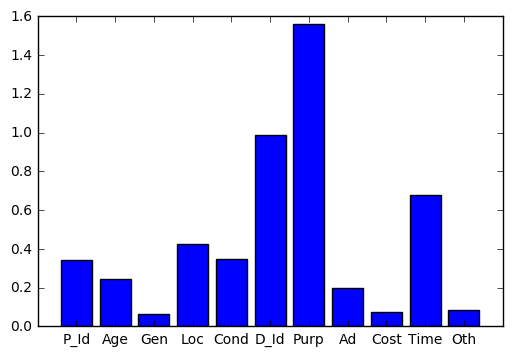

Case
2
MSE
0.872842004719
RMSE
1.02829666107
Importance
[ 0.06779575  0.04930576  0.0123834   0.08466567  0.07086019  0.19680994
  0.31089482  0.03970882  0.01483215  0.13617932  0.01656417]


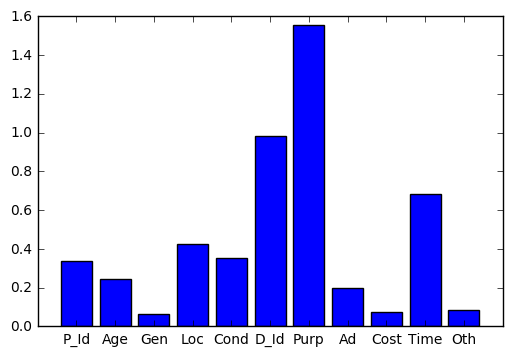

Case
3
MSE
0.872837062058
RMSE
1.0282388159
Importance
[ 0.06726729  0.04858294  0.01288608  0.08526553  0.07042266  0.19704684
  0.31100454  0.03952794  0.01455324  0.13713278  0.01631017]


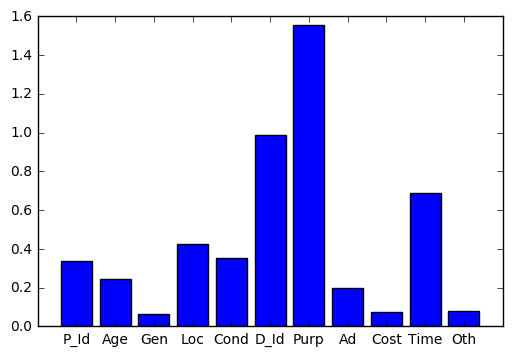

Case
4
MSE
0.872381399645
RMSE
1.02781703052
Importance
[ 0.06770465  0.0494177   0.01241662  0.08465466  0.07016695  0.19868269
  0.30985353  0.03964841  0.01479314  0.13661454  0.01604712]


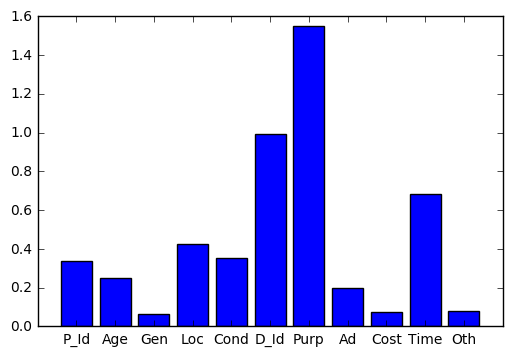

Case
5
MSE
0.872405750858
RMSE
1.02794514963
Importance
[ 0.06777511  0.04918912  0.01255264  0.08489611  0.07052278  0.19836336
  0.31016385  0.0398255   0.01463363  0.13583327  0.01624462]


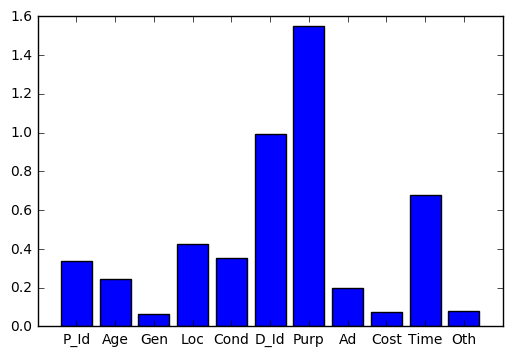

In [8]:
for case in range(1,6):
    mse = 0
    rmse = 0
    imp = np.zeros(11)

    for i in range(0,5):
        clf= RandomForestRegressor(n_estimators=case*100, min_samples_leaf= 70)
        clf.fit(train_matrix[i], train_label[i])
        predict_label = clf.predict(test_matrix[i])

        imp = imp + np.array(clf.feature_importances_)
        mse = mse + mean_absolute_error(test_label[i], predict_label)
        rmse = rmse + math.sqrt(mean_squared_error(test_label[i], predict_label))
    
    print 'Case'
    print case
    print 'MSE'
    print mse/5.0
    print 'RMSE'
    print rmse/5.0
    print 'Importance'
    print imp/5.0

    Labels =["P_Id","Age","Gen","Loc","Cond","D_Id","Purp","Ad","Cost","Time","Oth"] 
    x_axis = [1,2,3,4,5,6,7,8,9,10,11]

    #Labels =["P_Id","Age","Gen","Loc","Cond","D_Id","Purp","Ad","Cost","Time"] 
    #x_axis = [1,2,3,4,5,6,7,8,9,10]

    #Labels =["P_Id","Age","Gen","Cond","D_Id","Purp","Ad","Cost","Time"] 
    #x_axis = [1,2,3,4,5,6,7,8,9]

    #Labels =["P_Id","Age","Gen","Cond","D_Id","Purp","Time"] 
    #x_axis = [1,2,3,4,5,6,7]

    #Labels =["P_Id","D_Id"] 
    #x_axis = [1,2]

    #Labels =["P_Id","Age","Gen","Cond","D_Id","Purp","Ad","Cost","Time","Oth"] 
    #x_axis = [1,2,3,4,5,6,7,8,9,10]

    #Labels =["P_Id","Age","Gen","Cond","D_Id","Purp","Time","Oth"] 
    #x_axis = [1,2,3,4,5,6,7,8]

    #Labels =["P_Id","Cond","D_Id","Purp","Time","Oth"] 
    #x_axis = [1,2,3,4,5,6]

    #Labels =["P_Id","D_Id","Purp","Ad","Cost","Time","Oth"] 
    #x_axis = [1,2,3,4,5,6,7]

    #Labels =["P_Id","D_Id","Purp"] 
    #x_axis = [1,2,3]

    plt.bar(x_axis , imp, align='center')
    plt.xticks(x_axis, Labels)
    plt.show()

In [ ]:
mse = 0
rmse = 0
imp = np.zeros(7)

for i in range(0,5):
    clf= DecisionTreeRegressor(min_samples_leaf= 100)
    clf.fit(train_matrix[i], train_label[i])
    predict_label = clf.predict(test_matrix[i])
    
    imp = imp + np.array(clf.feature_importances_)
    mse = mse + mean_absolute_error(test_label[i], predict_label)
    rmse = rmse + math.sqrt(mean_squared_error(test_label[i], predict_label))
    
print 'MSE'
print mse/5.0
print 'RMSE'
print rmse/5.0
print 'Importance'
print imp/5.0

#Labels =["P_Id","Age","Gen","Loc","Cond","D_Id","Purp","Ad","Cost","Time"] 
#x_axis = [1,2,3,4,5,6,7,8,9,10]

#Labels =["P_Id","Age","Gen","Cond","D_Id","Purp","Ad","Cost","Time"] 
#x_axis = [1,2,3,4,5,6,7,8,9]

#Labels =["P_Id","Age","Gen","Cond","D_Id","Purp","Time"] 
#x_axis = [1,2,3,4,5,6,7]

#Labels =["P_Id","Age","Gen","Cond","D_Id","Purp","Time","Oth"] 
#x_axis = [1,2,3,4,5,6,7,8]

#plt.bar(x_axis , imp, align = 'center' )
#plt.xticks(x_axis, Labels)
#plt.show()

In [ ]:
mse = 0
rmse = 0
for i in range(0,5):
    clf= GaussianNB()
    clf.fit(train_matrix[i], train_label[i])
    predict_label = clf.predict(test_matrix[i])
    
    mse = mse + mean_absolute_error(test_label[i], predict_label)
    rmse = rmse + math.sqrt(mean_squared_error(test_label[i], predict_label))
    
print 'MSE'
print mse/5.0
print 'RMSE'

print rmse/5.0

In [ ]:
mae_final = 0
rmse_final = 0

for case in range(0,5):
    mae = 0 
    rmse = 0
    for i in range(0,5):
        clf= MLPRegressor(hidden_layer_sizes=(1300,1100,1000,800,700,600,500), max_iter = 800 )
        #clf= MLPRegressor()

        clf.fit(train_matrix[i], train_label[i])
        predict_label = clf.predict(test_matrix[i])

        mae = mae + mean_absolute_error(test_label[i], predict_label)
        rmse = rmse + math.sqrt(mean_squared_error(test_label[i], predict_label))
    
    print case
    print mae/5.0
    print rmse/5.0
    mae_final = mae_final + mae/5.0
    rmse_final = rmse_final + rmse/5.0

print "Final MAE Score"
print mae_final / 5.0

print "Final RMSE Score"
print rmse_final / 5.0

In [ ]:
mae_list = []
rmse_list = []

for case in range(10,31):
    
    mae_final = 0
    rmse_final = 0
    
    for iter in range(0,10):
        mae = 0 
        rmse = 0
        for i in range(0,5):
            clf= MLPRegressor(hidden_layer_sizes=case*100, max_iter = 500 )
            #clf= MLPRegressor()

            clf.fit(train_matrix[i], train_label[i])
            predict_label = clf.predict(test_matrix[i])

            mae = mae + mean_absolute_error(test_label[i], predict_label)
            rmse = rmse + math.sqrt(mean_squared_error(test_label[i], predict_label))

        mae_final = mae_final + mae/5.0
        rmse_final = rmse_final + rmse/5.0
    
    mae_list.append(mae_final/10.0)
    rmse_list.append(rmse_final/10.0)            

print case*100
for item in mae_list: 
    print item

for item in rmse_list:
    print item

print "\n"